## Import Libraries

In [ ]:
#Preprocessing
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE

#Modeling
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

#Evaluation
from sklearn.metrics import auc, roc_curve, roc_auc_score, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report 
import joblib
import pickle
import warnings
sns.set_theme()
warnings.filterwarnings('ignore')

`connect google drive`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


`load dataset`

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DSLS/Mini Project DS/aggregate_median_irregularities_Kota Bandung.csv')
df.head()

## Data Understanding


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11281 entries, 0 to 11280
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       11281 non-null  object 
 1   kemendagri_kabupaten_kode  11281 non-null  float64
 2   kemendagri_kabupaten_nama  11281 non-null  object 
 3   street                     11279 non-null  object 
 4   jam_level                  11281 non-null  int64  
 5   median_length              11281 non-null  float64
 6   median_delay_seconds       11281 non-null  float64
 7   median_regular_speed       11281 non-null  float64
 8   total_records              11281 non-null  int64  
 9   cause_type                 0 non-null      float64
 10  median_seconds             11281 non-null  float64
 11  median_speed               11281 non-null  float64
 12  date                       11281 non-null  object 
 13  median_jam_level           11281 non-null  flo

`statistics description for numerical features`

In [ ]:
df.describe()

,kemendagri_kabupaten_kode,jam_level,median_length,median_delay_seconds,median_regular_speed,total_records,cause_type,median_seconds,median_speed,median_jam_level,id
count,1.128100e+04,11281.000000,11281.000000,11281.000000,11281.000000,11281.000000,0.0,11281.000000,11281.000000,11281.000000,1.128100e+04
mean,3.273000e+01,3.547115,1389.094983,584.486836,17.479740,14.008067,NaN,723.977174,7.430116,3.547115,1.540737e+06
std,7.105742e-15,0.578823,853.658805,275.743863,9.133036,14.956688,NaN,308.161511,4.280327,0.578823,2.563784e+04
min,3.273000e+01,1.000000,500.000000,-97.000000,2.450000,1.000000,NaN,132.000000,0.880000,1.000000,1.492844e+06
25%,3.273000e+01,3.000000,788.000000,402.000000,12.445000,4.000000,NaN,523.000000,4.670000,3.000000,1.520824e+06
50%,3.273000e+01,4.000000,1158.000000,560.000000,16.250000,9.000000,NaN,690.000000,6.665000,4.000000,1.542382e+06
75%,3.273000e+01,4.000000,1742.000000,724.000000,20.370000,19.000000,NaN,879.000000,9.140000,4.000000,1.561431e+06
max,3.273000e+01,4.000000,13201.000000,4368.500000,90.100000,176.000000,NaN,4295.500000,54.810000,4.000000,1.583491e+06


`value description for categorical columns`

In [ ]:
df.select_dtypes('object').describe()

,time,kemendagri_kabupaten_nama,street,date,geometry
count,11281,11281,11279,11281,11281
unique,892,1,229,61,10605
top,2022-08-19 17:00:00.000,KOTA BANDUNG,N11 Soekarno-Hatta,2022-08-19,"LINESTRING (107.58148 -6.882219, 107.581484 -6..."
freq,85,11281,811,535,9


### Check Null Values

In [ ]:
num_null = df.isnull().sum()                                    # number of null values
pct_null = round((num_null/df.shape[0] * 100), 2)               # percentage null values
df_null = pd.DataFrame({                                        # create dataframe for number of null value and percentage of null values
                        'Null Values':num_null,
                        'Percentage':pct_null}).reset_index()

df_null.rename(columns={'index':'Features'}, inplace=True)      # rename column index to Feature
df_null = df_null[df_null['Null Values'] > 0]                   # filtering null values

df_null = df_null.sort_values('Null Values', ascending=False).reset_index(drop=True)
df_null

,Features,Null Values,Percentage
0,cause_type,11281,100.00
1,street,2,0.02


`didapatkan bahwa terdapat 2 feature yang memiliki data null. Feature cause_type akan dihapus karena tidak memberikan informasi`

### Duplicated Data

In [ ]:
num_duplicated = df.duplicated().sum()
print(f"Total number of duplicate values : {num_duplicated}")

Total number of duplicate values : 0


`didapatkan bahwa data yang dimiliki tidak terdapat data duplikat`

## Data Cleansing

### Check Unique Values

`Categorical Features`

In [ ]:
for col in df.select_dtypes('object').columns:
  print('Features :', col)
  print(df[col].unique())

Features : time
['2022-07-06 07:00:00.000' '2022-07-06 08:00:00.000'
 '2022-07-06 09:00:00.000' '2022-07-06 10:00:00.000'
 '2022-07-06 11:00:00.000' '2022-07-06 12:00:00.000'
 '2022-07-06 13:00:00.000' '2022-07-06 14:00:00.000'
 '2022-07-06 15:00:00.000' '2022-07-06 16:00:00.000'
 '2022-07-06 17:00:00.000' '2022-07-06 18:00:00.000'
 '2022-07-06 19:00:00.000' '2022-07-06 20:00:00.000'
 '2022-07-06 22:00:00.000' '2022-07-07 08:00:00.000'
 '2022-07-07 09:00:00.000' '2022-07-07 10:00:00.000'
 '2022-07-07 11:00:00.000' '2022-07-07 12:00:00.000'
 '2022-07-07 13:00:00.000' '2022-07-07 14:00:00.000'
 '2022-07-07 15:00:00.000' '2022-07-07 16:00:00.000'
 '2022-07-07 17:00:00.000' '2022-07-07 18:00:00.000'
 '2022-07-07 19:00:00.000' '2022-07-07 20:00:00.000'
 '2022-07-07 21:00:00.000' '2022-07-08 07:00:00.000'
 '2022-07-08 08:00:00.000' '2022-07-08 09:00:00.000'
 '2022-07-08 10:00:00.000' '2022-07-08 11:00:00.000'
 '2022-07-08 12:00:00.000' '2022-07-08 13:00:00.000'
 '2022-07-08 14:00:00.000' '20

`Numerical Features`

In [ ]:
for col in df.select_dtypes('number').columns:
  print('Features :', col)
  print(df[col].unique())

Features : kemendagri_kabupaten_kode
[32.73]
Features : jam_level
[4 3 1 2]
Features : median_length
[1922.  1819.  1064.  ... 3449.  1028.  2011.5]
Features : median_delay_seconds
[ 657.   421.   586.  ... 1609.  1185.   232.5]
Features : median_regular_speed
[15.77     17.939999 14.52     ... 15.905    22.835    17.849998]
Features : total_records
[ 13   2  11  20   1   9  24  12  17   7   3   8  47  22   5  19   4  40
  21  54   6  10  18  32  15  30  34  52  16  51  31  53  41  23  39  55
  14  48  43  36  60  44  35  27  38  50  37  57  68  28  25  33  26  42
  46  59  45  58 115 146  29  71 135  64  92  56  61  88  82  97  72 101
  94 120  78 113  69  99  76  49 109  77  98  81  75  96  62  79  83  65
  89 104  87  73  85 102  70  63  74  93 116  67  95  91 106 159 110  84
 176  90 112  80 108  66  86]
Features : cause_type
[nan]
Features : median_seconds
[ 844.   572.   675.  ... 1461.   570.5  764.5]
Features : median_speed
[ 7.51      11.6        6.14      ...  3.9450002  9.12

`Setelah melakukan check unique value pada tiap fitur, terlihat bahwa tidak ada kesalahan penulisan`

### Drop Features

In [ ]:
drop_column = ['kemendagri_kabupaten_kode', 'kemendagri_kabupaten_nama', 'cause_type', 'id', 'geometry']
df.drop(drop_column, axis=1, inplace=True)
df.head()

,time,street,jam_level,median_length,median_delay_seconds,median_regular_speed,total_records,median_seconds,median_speed,date,median_jam_level
0,2022-07-06 07:00:00.000,Terusan Buah Batu,4,1922.0,657.0,15.770000,13,844.0,7.51,2022-07-06,4.0
1,2022-07-06 07:00:00.000,Jenderal AH Nasution,3,1819.0,421.0,17.939999,2,572.0,11.60,2022-07-06,3.0
2,2022-07-06 07:00:00.000,Jenderal AH Nasution,4,1064.0,586.0,14.520000,11,675.0,6.14,2022-07-06,4.0
3,2022-07-06 07:00:00.000,N11 Soekarno-Hatta,4,919.0,558.5,15.095000,20,632.0,4.97,2022-07-06,4.0
4,2022-07-06 07:00:00.000,Terusan Buah Batu,3,2024.0,599.0,15.830000,1,786.0,9.26,2022-07-06,3.0


### Handling Missing Values

In [ ]:
df.dropna(axis=0, inplace=True)       # drop null values
df.isna().sum()                       # check again missing value

time                    0
street                  0
jam_level               0
median_length           0
median_delay_seconds    0
median_regular_speed    0
total_records           0
median_seconds          0
median_speed            0
date                    0
median_jam_level        0
dtype: int64

### Converting Data Type

In [ ]:
df.dtypes                             # check data type

time                     object
street                   object
jam_level                 int64
median_length           float64
median_delay_seconds    float64
median_regular_speed    float64
total_records             int64
median_seconds          float64
median_speed            float64
date                     object
median_jam_level        float64
dtype: object

In [ ]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type unique_sample'.split())
desc_df

,feature,data_type,unique_sample
0,time,object,"[2022-07-06 07:00:00.000, 2022-07-06 08:00:00...."
1,street,object,"[Terusan Buah Batu, Jenderal AH Nasution, N11 ..."
2,jam_level,int64,"[4, 3, 1, 2]"
3,median_length,float64,"[1922.0, 1819.0, 1064.0, 919.0]"
4,median_delay_seconds,float64,"[657.0, 421.0, 586.0, 558.5]"
5,median_regular_speed,float64,"[15.77, 17.939999, 14.52, 15.095]"
6,total_records,int64,"[13, 2, 11, 20]"
7,median_seconds,float64,"[844.0, 572.0, 675.0, 632.0]"
8,median_speed,float64,"[7.51, 11.6, 6.14, 4.97]"
9,date,object,"[2022-07-06, 2022-07-07, 2022-07-08, 2022-07-09]"


In [ ]:
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df['date'] = pd.to_datetime(df['date'], errors='coerce')

## Exploratory Data Analysis

`Univariat`

In [ ]:
def line_plot_per_street(street, column):
  plt.figure(figsize=(6, 5))
  sns.lineplot(data=df[df['street'] == street], x='time', y=column)
  plt.title('Tren {} in {}'.format(column, street), size=20, pad=20, weight='bold')
  plt.xticks(rotation=45)
  plt.show()

In [ ]:
def jam_level_per_street(street):
  plt.figure(figsize=(6, 5))
  df[df['street'] == street].groupby('jam_level')['jam_level'].count().plot(kind='bar')
  plt.title('Distribution Jam Level in {}'.format(street), size=12, pad=20, weight='bold')
  plt.xlabel('Jam Level')
  plt.xticks(rotation=0)
  plt.show()

#### Jam Level

In [ ]:
df.groupby('street')['jam_level'].mean().sort_values(ascending=False)

street
Suryalaya                      4.000000
Kalipah Apo                    4.000000
Jalan Kuningan Raya            4.000000
Jalan Arcamanik Sindanglaya    4.000000
Kebon Kopi                     4.000000
                                 ...   
Tol Padaleunyi                 2.761468
Tol Pasteur                    2.742857
Cipedes                        2.500000
Cilengkrang 1                  2.500000
Cinangka                       2.333333
Name: jam_level, Length: 229, dtype: float64

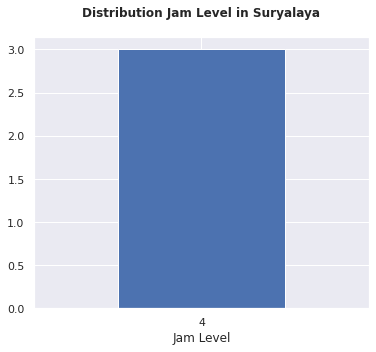

In [ ]:
print(jam_level_per_street('Suryalaya'))
print(jam_level_per_street('Tol Padaleunyi'))

#### Median Delay Seconds

In [ ]:
df.groupby('street')['median_delay_seconds'].mean().sort_values(ascending=False)

street
Dago Giri                    1377.850000
Tol Pasir Koja                963.666667
Pasirmuncang                  912.384615
Terusan Gegerkalong Hilir     895.000000
Dr Setiabudi                  887.920082
                                ...     
Jalan Raya Randusari          337.500000
Turangga                      334.833333
Jalan Jakarta                 331.000000
Wastukencana                  308.500000
Cilengkrang 1                 251.500000
Name: median_delay_seconds, Length: 229, dtype: float64

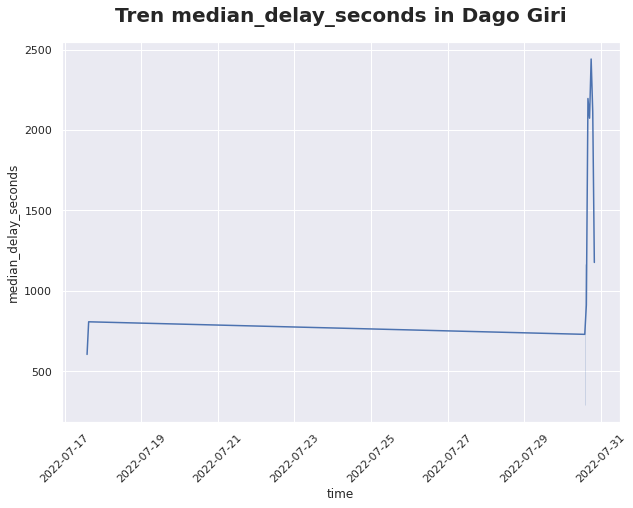

In [ ]:
print(line_plot_per_street('Dago Giri', 'median_delay_seconds'))
print(jam_level_per_street('Dago Giri'))

### Data Outliers

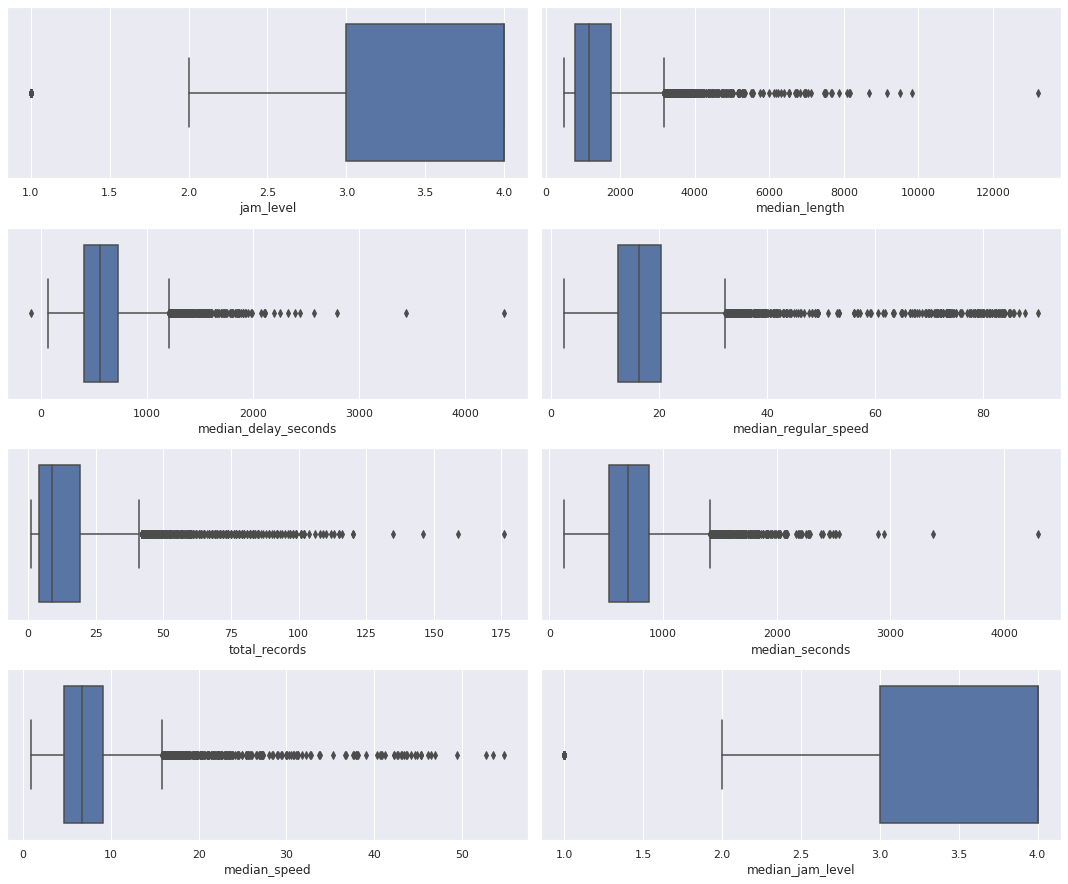

In [ ]:
num = df.select_dtypes('number').columns

plt.figure(figsize=(10,15))
for i in range(0,len(num)):
    plt.subplot(5,len(num)/3,i+1)
    sns.boxplot(data=df,x=df[num[i]])
    plt.tight_layout();

`terlihat bahwa hampir semua feature memiliki nilai outliers`

### Data Distribution

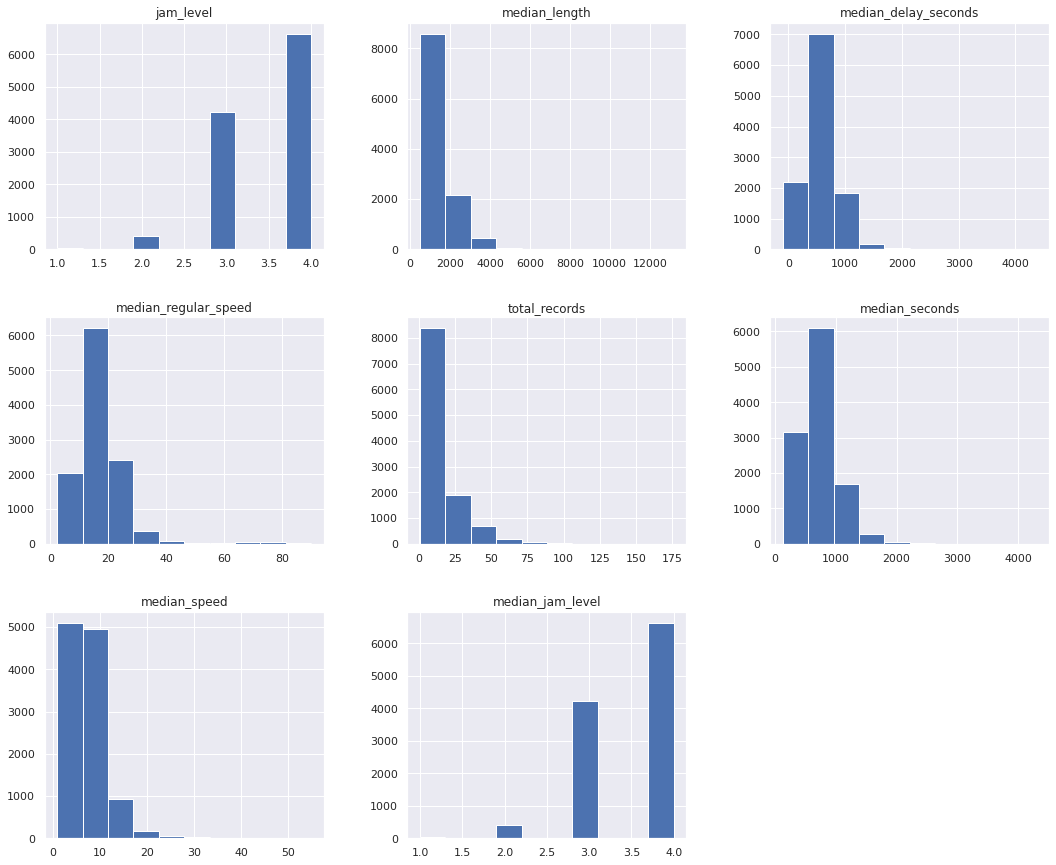

In [ ]:
df.select_dtypes('number').hist(figsize=(15,15));

### Correlation Features

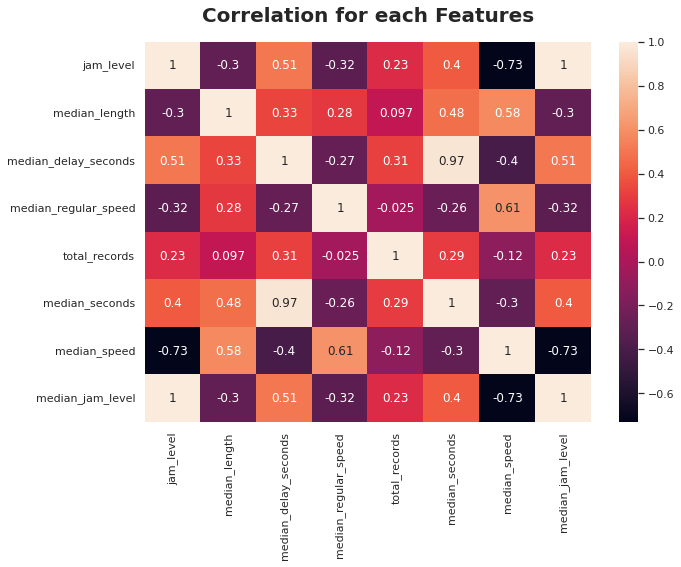

In [ ]:
# Correlation heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation for each Features', pad=20, size=20, weight='bold')
plt.show()

`terlihat bahwa ada bebrapa feature yang memiliki korelasi positif dan negatif`

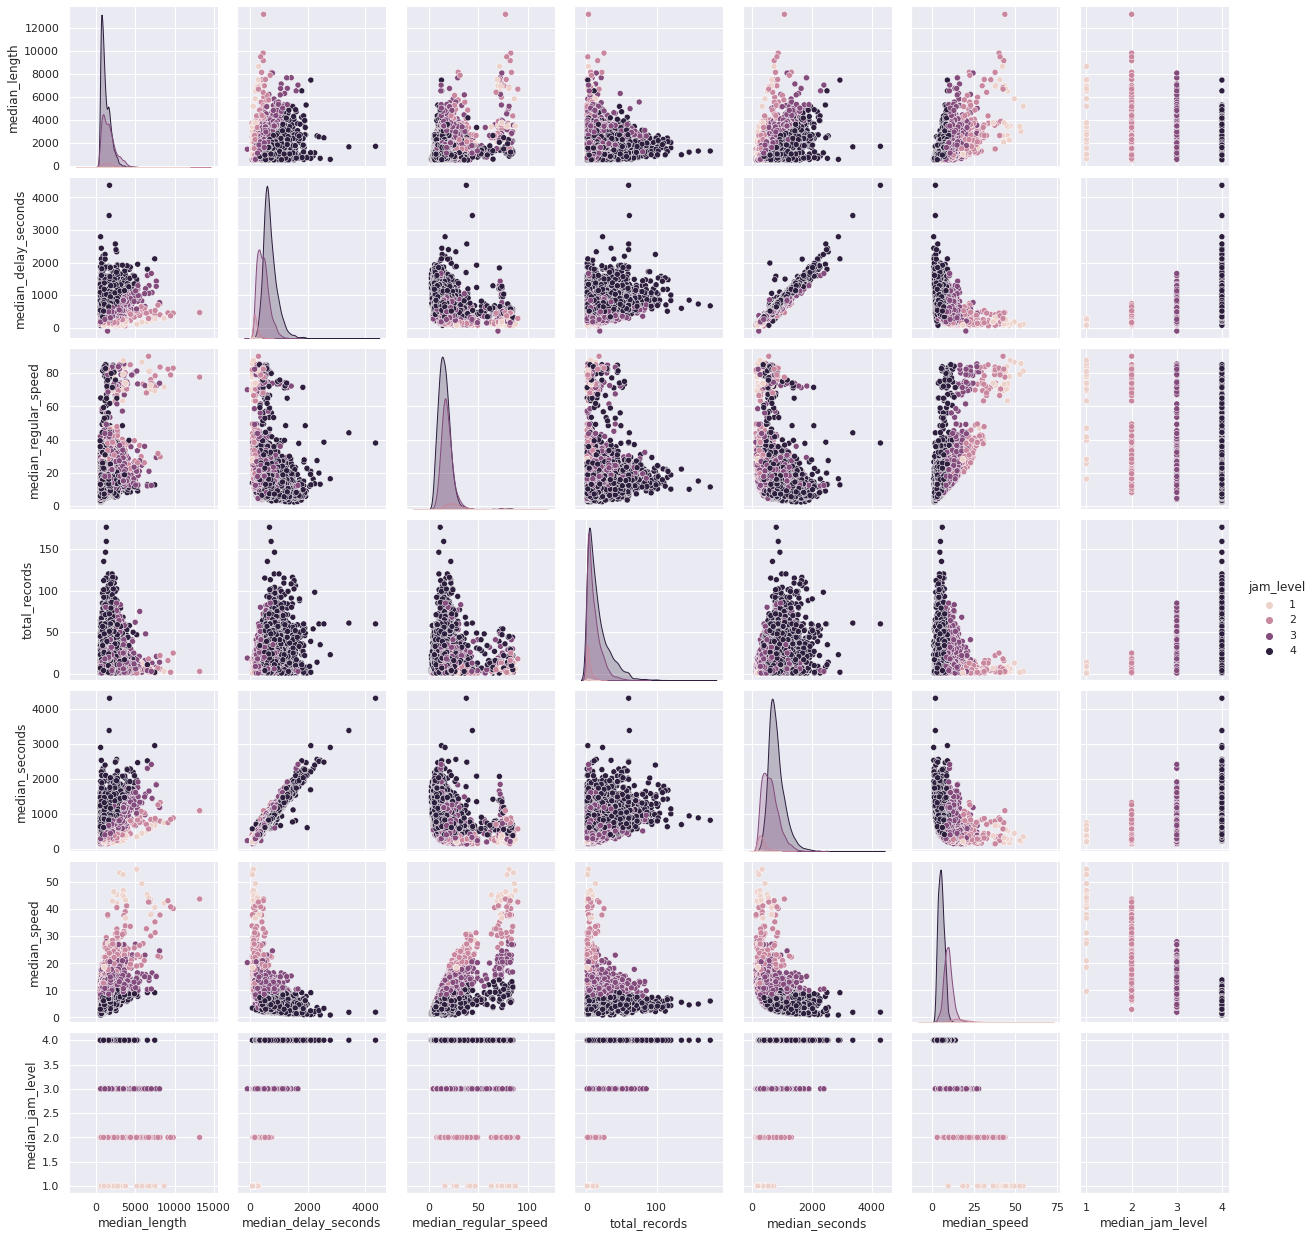

In [ ]:
sns.pairplot(df.select_dtypes('number'), hue='jam_level')

### Remove Features
akan dihapus feature yang dirasa tidak penting seperti **time**, **street**, **date** dan **median_jam_level**. **median_jam_level** akan kita hapus karena feature tersebut sudah terwakilkan oleh feature **jam_level** yang akan menjadi target predict.

In [ ]:
drop_col = ['time', 'street', 'date', 'median_jam_level']
df.drop(drop_col, axis=1, inplace=True)
df.head()

### Feature Scaling

In [ ]:
col_scaled = list(df.select_dtypes('number').columns)           # feature scaling using RobustScaler
col_scaled.remove('jam_level')                                  # exclude jam_level for scaling
df[col_scaled] = RobustScaler().fit_transform(df[col_scaled])
df.head()

,jam_level,median_length,median_delay_seconds,median_regular_speed,total_records,median_seconds,median_speed
0,4,0.801048,0.301242,-0.060549,0.266667,0.432281,0.188827
1,3,0.693054,-0.431677,0.213182,-0.466667,-0.331228,1.102793
2,4,-0.098558,0.080745,-0.218228,0.133333,-0.042105,-0.117318
3,4,-0.250590,-0.004658,-0.145695,0.733333,-0.162807,-0.378771
4,3,0.907995,0.121118,-0.052980,-0.533333,0.269474,0.579888


### Separating Train and Test Set

In [ ]:
X = df.drop('jam_level', axis=1)
y = df['jam_level']\

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print('Shape of X_train', X_train.shape)
print('Shape of y_train', y_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_test', y_test.shape)

### Oversampling Using SMOTE
`feature target terdapat imbalanced class, maka akan dilakukan oversampling menggunakan metode SMOTE pada data training`

In [ ]:
pd.Series(y_train).value_counts()

4    5965
3    3801
2     360
1      25
Name: jam_level, dtype: int64

In [ ]:
X_train_over, y_train_over = SMOTE().fit_resample(X_train, y_train)
pd.Series(y_train_over).value_counts()

4    5965
3    5965
2    5965
1    5965
Name: jam_level, dtype: int64

## Modeling

In [ ]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier() 
abc = AdaBoostClassifier()
etc = ExtraTreesClassifier() 
gbc = GradientBoostingClassifier() 
bgc = BaggingClassifier()
knn = KNeighborsClassifier() 
logreg = LogisticRegression()
xgb = XGBClassifier()
mlp = MLPClassifier()
nb = GaussianNB()
svm = SVC()

models = [dtc, rfc, abc, etc, gbc, bgc, knn, logreg, xgb, mlp, nb, svm]
model_name = []
for name in models:
    names = str(type(name)).split('.')[-1][:-2]
    model_name.append(names)

#### Cross Validation

In [ ]:
dtc_score = cross_val_score(models[0], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
rfc_score = cross_val_score(models[1], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
abc_score = cross_val_score(models[2], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
etc_score = cross_val_score(models[3], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
gbc_score = cross_val_score(models[4], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
bgc_score = cross_val_score(models[5], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
knn_score = cross_val_score(models[6], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
logreg_score = cross_val_score(models[7], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
xgb_score = cross_val_score(models[10], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
mlp_score = cross_val_score(models[11], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
nb_score = cross_val_score(models[8], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
svm_score = cross_val_score(models[9], X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

In [ ]:
cv_result = [
    dtc_score, rfc_score, abc_score, etc_score, gbc_score, bgc_score, 
    knn_score, logreg_score, nb_score, svm_score, xgb_score, mlp_score]

df_cv_result = pd.DataFrame(cv_result, index=model_name)
df_cv_result

,0,1,2,3,4
DecisionTreeClassifier,0.860372,0.856826,0.849291,0.847518,0.847007
RandomForestClassifier,0.902926,0.886968,0.891844,0.888741,0.890909
AdaBoostClassifier,0.767730,0.745124,0.790780,0.699468,0.717960
ExtraTreesClassifier,0.899379,0.887855,0.892287,0.890957,0.885144
GradientBoostingClassifier,0.896277,0.888298,0.886968,0.890071,0.889579
BaggingClassifier,0.898936,0.866135,0.888298,0.881649,0.882483
KNeighborsClassifier,0.885638,0.872340,0.865248,0.861702,0.865188
LogisticRegression,0.900266,0.893174,0.887855,0.892730,0.893126
GaussianNB,0.860816,0.835106,0.830674,0.837766,0.839468
SVC,0.904255,0.889628,0.890514,0.890957,0.892239


In [ ]:
cv_mean = []
i = 0
for mean in cv_result:                                # Kalkulasi rata-rata setiap k-fold validation
    mean = cv_result[i].mean()
    cv_mean.append(mean)
    i += 1

cv_std = []
i = 0 
for mean in cv_result:                                # Kalkulasi standart deviasi setiap k-fold validation
    std = cv_result[i].std()
    cv_std.append(std)
    i += 1

#Merge Kalkulasi Mean dan Std
df_cv = pd.DataFrame({'score_mean':cv_mean, 'score_std':cv_std}, index=model_name).sort_values(['score_mean', 'score_std'], ascending=False)
df_cv

`didapatkan bahwa MLPClassifier memiliki performa terbaik dengan rata-rata akurasi mencapai 90.59% dan standard deviasi 0.003957`

#### Fit and Evaluation

In [ ]:
train_score = []
test_score = []
default_models = []

skf = StratifiedKFold(random_state=42, shuffle=True)
df_train_test = pd.DataFrame()

for train_index, test_index in skf.split(X_train_over, y_train_over):
    for i in models:
        default_models.append(i.fit(X_train_over, y_train_over))        # fit each model
        train_score.append(model.score(X_train_over, y_train_over))     # accuracy for training set
        test_score.append(model.score(X_test, y_test))                  # accuracy for testing set

`average train score model`

In [ ]:
train_score_dtc = np.sum(train_score[0::12])/len(train_score[0::12]) 
train_score_rfc = np.sum(train_score[1::12])/len(train_score[1::12])
train_score_abc = np.sum(train_score[2::12])/len(train_score[2::12])
train_score_etc = np.sum(train_score[3::12])/len(train_score[3::12])
train_score_gbc = np.sum(train_score[4::12])/len(train_score[4::12])
train_score_bgc = np.sum(train_score[5::12])/len(train_score[5::12])
train_score_knn = np.sum(train_score[6::12])/len(train_score[6::12])
train_score_logreg = np.sum(train_score[7::12])/len(train_score[7::12])
train_score_nbc = np.sum(train_score[8::12])/len(train_score[8::12])
train_score_svm = np.sum(train_score[9::12])/len(train_score[9::12])
train_score_xgb = np.sum(train_score[10::12])/len(train_score[10::12])
train_score_mlp = np.sum(train_score[11::12])/len(train_score[11::12])

`average test score model`

In [ ]:
test_score_dtc = np.sum(test_score[0::12])/len(test_score[0::12]) 
test_score_rfc = np.sum(test_score[1::12])/len(test_score[1::12])
test_score_abc = np.sum(test_score[2::12])/len(test_score[2::12])
test_score_etc = np.sum(test_score[3::12])/len(test_score[3::12])
test_score_gbc = np.sum(test_score[4::12])/len(test_score[4::12])
test_score_bgc = np.sum(test_score[5::12])/len(test_score[5::12])
test_score_knn = np.sum(test_score[6::12])/len(test_score[6::12])
test_score_logreg = np.sum(test_score[7::12])/len(test_score[7::12])
test_score_nbc = np.sum(test_score[8::12])/len(test_score[8::12])
test_score_svm = np.sum(test_score[9::12])/len(test_score[9::12])
test_score_xgb = np.sum(test_score[10::12])/len(test_score[10::12])
test_score_mlp = np.sum(test_score[11::12])/len(test_score[11::12])

`set score to dataset`

In [ ]:
trainScore = [
    train_score_dtc, train_score_rfc, train_score_abc, train_score_etc, train_score_gbc, train_score_bgc,
    train_score_knn, train_score_logreg, train_score_nbc, train_score_svm, train_score_xgb, train_score_mlp] 

testScore = [
    test_score_dtc, test_score_rfc, test_score_abc, test_score_etc, test_score_gbc, test_score_bgc,
    test_score_knn, test_score_logreg, test_score_nbc, test_score_svm, test_score_xgb, test_score_mlp] 

df_avg_score = pd.DataFrame({
    'train score':trainScore,
    'test score':testScore},
    index=model_name)

df_avg_score['difference'] = abs(df_avg_score['train score'] - df_avg_score['test score'])
df_avg_score = df_avg_score.sort_values(['difference'], ascending=True)
df_avg_score

,train score,test score,difference
GaussianNB,0.786588,0.785461,0.001127
AdaBoostClassifier,0.692456,0.695922,0.003466
SVC,0.895725,0.867908,0.027817
LogisticRegression,0.908592,0.874113,0.034478
XGBClassifier,0.924811,0.869681,0.055131
GradientBoostingClassifier,0.942330,0.883865,0.058465
MLPClassifier,0.952523,0.893972,0.058551
ExtraTreesClassifier,1.000000,0.903723,0.096277
RandomForestClassifier,0.999975,0.900709,0.099266
KNeighborsClassifier,0.958382,0.852837,0.105545


>Dari evaluasi model, maka akan dipilih model SVC karena nilai akurasi data training dan testing cukup tinggi dan tidak terjadi overfitting, 

>MLPClassifier dengan cross validation memiliki akurasi yang tinggi, tetapi waktu run model cukup lama dibanding SVC, dan nilai akurasi keduanya saling mendekati.

### FINAL MODEL (Support Vector Classifier)

In [ ]:
svm = SVC()
svm.fit(X_train_over, y_train_over)

y_pred = svm.predict(X_test)

train_score_def = round((svm.score(X_train_over, y_train_over) * 100), 2)
test_score_def = round((svm.score(X_test, y_test) * 100), 2)
f1_score_def = round((f1_score(y_test, y_pred, average='macro')) * 100, 2)

print('Training Accuracy : {}%'.format(train_score_def))
print('Test Accuracy : {}%'.format(test_score_def))
print('F1_Macro Score : {}%'.format(f1_score_def))

Training Accuracy : 89.57%
Test Accuracy : 86.79%
F1_Macro Score : 79.18%


#### Hyperparameters Tuning

In [ ]:
svm = SVC()
params = {'C': [0.1, 1, 10, 100], 
          'gamma': ['scale', 'auto'],
          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 

grid_result = GridSearchCV(svm, params, scoring='accuracy', cv=5)
grid_result.fit(X_train_over, y_train_over)

In [ ]:
grid_result.best_params_

{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}

In [ ]:
svm_tuned = SVC(**grid_result.best_params_)
svm_tuned.fit(X_train_over, y_train_over)

y_pred_tuned = svm_tuned.predict(X_test)

train_score_tuned = round((svm_tuned.score(X_train_over, y_train_over) * 100), 2)
test_score_tuned = round((svm_tuned.score(X_test, y_test) * 100), 2)
f1_score_tuned = round((f1_score(y_test, y_pred, average='macro')) * 100, 2)

print('Training Accuracy : {}%'.format(train_score_tuned))
print('Test Accuracy : {}%'.format(test_score_tuned))
print('F1_Macro Score : {}%'.format(f1_score_tuned))

Training Accuracy : 95.58%
Test Accuracy : 89.01%
F1_Macro Score : 79.18%


In [ ]:
pd.DataFrame({
    'train_acc':[train_score_def, train_score_tuned],
    'test_acc':[test_score_def, test_score_tuned],
    'f1-score':[f1_score_def, f1_score_tuned]}, index=['svm_default', 'svm_tuned'])

,train_acc,test_acc,f1-score
svm_default,89.57,86.79,79.18
svm_tuned,95.58,89.01,79.18


>Didapatkan perbandingan hasil akurasi default parameter dan hyperparameter tuning. Dari hasil training menggunakan hyperparameter tuning, SVM dengan menggunakan default parameter menghasilkan nilai akurasi lebih kecil daripada hasil hyperparameter tuning dengan perbedaan sekitar 2% pada data testing.

>Maka dapat dikatakan bahwa bahwa model mengalami sedikit overfitting. Maka pada training model ini saya akan memilih model SVM dengan default parameter karena perbedaan akurasi pada data training dan testing tidak terlalu jauh.

####Model Evaluation

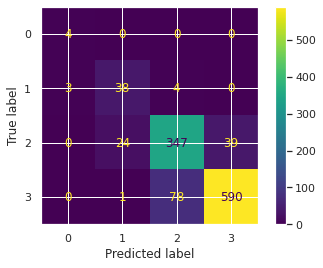

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.57      1.00      0.73         4
           2       0.60      0.84      0.70        45
           3       0.81      0.85      0.83       410
           4       0.94      0.88      0.91       669

    accuracy                           0.87      1128
   macro avg       0.73      0.89      0.79      1128
weighted avg       0.88      0.87      0.87      1128



In [ ]:
filename = 'final_model_miniproject_ds.sav'
pickle.dump(gbc, open(filename, 'wb'))